# IBM/Coursera Capstone Project - The Battle of Neighborhoods


## Setting up a dog walking buisness in Seattle


**Helena Lewczynska**

**2021 May.30 @ Houston, USA**

## Table of contents
    * Introduction
    * Methodology
    * Data
    * Analysis
    * Results and Discussion
    * Conclusion


## Introduction

My partner and I have recently decided to move from Houston to Seattle. I know.. expensive right!

I have toyed with the idea of setting up a dogwalking buisness as I love my furry friends and now have a pup of my own called Ellie.

So, the questions are: 

1. Which neighbourhoods suit my family and I?

2. Which neighborhoods in Seattle are most likely to require someone to walk their dog?

3. Do any of these neighbourhoods provide the best of both worlds?

In this project, I will attempt to answer the above questions. First I will explore the best neighborhoods that fit my own family life. Next, I will find which neighborhoods in Seattle would probably need a dog walker. Finally, I will try and find out which areas would provide the best of both!

To complete this task, I will use Foursquare location data to get the most common venue categories in each neighborhood and map which neighborhoods contain our favorite ones. Then i will use some data i found on Seattle pet populations to find which neighborhoods contain the most dogs and of what breed. Lastly i will try to analyse which neigborhoods would best suit my lifestyle but also give me the ability to start up my dog walking buisness.

# Methodology

In this project, I am trying to explore neighborhoods in Seattle that would be suitable for myself and a new buisness.

The stakeholders of this project is therefore myself and my family.

To complete this task, i will perform the following steps:

- Collecting data: Including Seattle Neighborhood data, venues nearby each neighborhood which will be generated by Foursquare API and pet data from the Seattle Open Source Website
- Exploratory data analysis to better understand our working dataset.
- Creating Map of Seattle with Folium library overlaying neighborhood characteristics and pet data.
- Anlaysing which neighbourhoods we should consider based on analysis of pets and venues.

## Data

For this project I have used the following datasets:

1. Seattle neighborhood data with latitude and longitude coordinates

2. Foursquare location data: Most common categories

3. Dataset on pet licences in Seattle

In the next section i will describe preliminary data importing and preparation.

Before we start, lets import all necessary libraries and setup our forsquare IDs:

In [396]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

# Setting up IDs for foursquare

CLIENT_ID = 'J2VNJFAYIYLLMUX0BP25WE1WMWUQOKRASOM0TDWHJIV0NMUG' # your Foursquare ID
CLIENT_SECRET = 'GXRQDD3VXGVRVSN4JGGPEJN1TTLSE3EMML5ZK4KTWVDCBFW2' # your Foursquare Secret
ACCESS_TOKEN = 'EW4X4KIJXWWJ5HCRXYBYL2YAYXJRBT4GAPIOTBF5LOC1ZCQF' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Folium installed
Libraries imported.
Your credentails:
CLIENT_ID: J2VNJFAYIYLLMUX0BP25WE1WMWUQOKRASO

### 1. Seattle neighborhood data
I did not find any dataset containing both Seattle neighborhoods and coordinates so I found two datasets and merged them together:
1. Seattle neighborhood and zip code info: http://seattlearea.com/zip-codes/
2. Seattle coordinates and zip code info: https://www.unitedstateszipcodes.org/wa/#zips-list

I am using IBM Watson studio to complie my Jupyter Notebook. The following code is automatically entered after I import my CSV datasets located under My Project > Assets tab and then select to convert to a pandas dataframe, handy!\

I start by cleaning up the columns and taking a look at the data:

In [397]:
# Importing Seattle zipcode and neighborhood data

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_7090f49ae7784ed7b279229f4ce3b604 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_7090f49ae7784ed7b279229f4ce3b604 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_7090f49ae7784ed7b279229f4ce3b604 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2ZwgA88EFSR0aTw0LWiCTJ4I1Evno24I3tc6U--k--3k',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_7090f49ae7784ed7b279229f4ce3b604)

body = client_7090f49ae7784ed7b279229f4ce3b604.get_object(Bucket='helenax27sproject-donotdelete-pr-2wln2ucz6htuks',Key='seattle_area_zips.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )    

seattle_zips = pd.read_csv(body) # read in the csv and convert to df - automatic code
seattle_zips.drop(columns=['A', 'B','C'],inplace=True) # drop unwanted columns
seattle_zips = seattle_zips.sort_values(by=['Zipcode'], ascending=True) # sort by zipcode
seattle_zips.head()

,Zipcode,Neighborhood
0,98003,Federal Way
1,98005,Bellevue
2,98033,Kirkland
3,98037,Lynnwood
4,98040,Mercer Island


In [398]:
# Import US zip code database
body = client_7090f49ae7784ed7b279229f4ce3b604.get_object(Bucket='helenax27sproject-donotdelete-pr-2wln2ucz6htuks',Key='zip_code_database.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df = df[['zip', 'latitude', 'longitude']]
df.rename(columns = {'zip':'Zipcode', 'latitude': 'Latitude', 'longitude':'Longitude' }, inplace=True)
df.head()

,Zipcode,Latitude,Longitude
0,501,40.81,-73.04
1,544,40.81,-73.04
2,601,18.16,-66.72
3,602,18.38,-67.18
4,603,18.43,-67.15


In order to plot the neighbourhoods on a map, i need to merge the latitude and longitude data to the Neighbourhood names. I do this my merging on the Zipcode column of both datasets:

In [399]:
neighborhoods = pd.merge(df, seattle_zips, on="Zipcode")
neighborhoods = neighborhoods.drop_duplicates(subset='Zipcode', keep="first")
neighborhoods.sort_values(by=['Neighborhood'], inplace=True)
neighborhoods.head()

,Zipcode,Latitude,Longitude,Neighborhood
20,98110,47.64,-122.53,Bainbridge Island
17,98107,47.67,-122.38,Ballard
1,98005,47.62,-122.16,Bellevue
25,98121,47.62,-122.35,Belltown
9,98102,47.63,-122.32,Capital Hill


### Foursquare location data

Now I will use the Foursquare API to identify venues in each neighborhood which I like the best. For generating the nearby venues, i have chosen a radius of 2km and limit to the top 80 venues.

In [400]:
# function to loop each neighborhood and get the 80 venues within 2km.
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT = 80):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [401]:
# run the function above to get nearby venues for each neighborhood
venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                        latitudes=neighborhoods['Latitude'],
                        longitudes=neighborhoods['Longitude']
                                  )
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bainbridge Island,47.64,-122.53,Storyville Coffee Roasting Studio,47.648323,-122.523960,Coffee Shop
1,Bainbridge Island,47.64,-122.53,Fletcher Bay Winery,47.648285,-122.525015,Wine Bar
2,Bainbridge Island,47.64,-122.53,Bainbridge Island Brewing,47.648299,-122.525042,Brewery
3,Bainbridge Island,47.64,-122.53,Jake's Pickup,47.636094,-122.516740,Café
4,Bainbridge Island,47.64,-122.53,Bainbridge Island Aquatic Center,47.638323,-122.522930,Gym Pool


In [402]:
# size of venues dataset
ven_size = venues.shape
print('The venues dataset has {} rows and {} columns.'.format(ven_size[0], ven_size[1]))

The venues dataset has 1557 rows and 7 columns.


### Seattle pet data
For the Seattle data on pets, I have used the The Open Data Program > https://data.seattle.gov/ < generated by the City of Seattle. This makes data openly available to the public for the purpose of increasing the quality of life for residents; increasing transparency, accountability and comparability; promoting economic development and research; and improving internal performance management.

I found the following dataset avaliable: https://data.seattle.gov/Community/Seattle-Pet-Licenses/jguv-t9rb which is a list of active/current Seattle pet licenses, including animal type (species), pet's name, breed and the owner's ZIP code.

In [403]:
# Importing the dataset

body = client_7090f49ae7784ed7b279229f4ce3b604.get_object(Bucket='helenax27sproject-donotdelete-pr-2wln2ucz6htuks',Key='Seattle_Pet_Licenses.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Leave only rows with dogs, remove NaN's and rename ZIP Code for later merging
    
pets = pd.read_csv(body)
pets.head()
pets.rename(columns = {'ZIP Code':'Zipcode'}, inplace=True)
pets = pets.dropna()
pets['Zipcode'] = pets['Zipcode'].astype(int)
pets.head()

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,Zipcode
0,December 18 2015,S107948,Zen,Cat,Domestic Longhair,Mix,98117
13,May 16 2018,S126432,Chico,Cat,Domestic Shorthair,Mix,98122
15,July 10 2018,85322,Zen,Cat,Domestic Shorthair,Siamese,98105
16,August 13 2018,578368,Lucky,Cat,Oriental Shorthair,Mix,98106
17,August 30 2018,S121902,Buffy,Cat,Siamese,European Shorthair,98107


# Analysis

## Exploratory Data Analysis

In the section, we will explore the venue and pet data and start with some exploratory data analysis.

In [404]:
# check how many neighborhoods we successfully got venues from.
n = len(venues.Neighborhood.unique())
print('The venues dataset has venues for {} unique neighborhoods.'.format(n))

The venues dataset has venues for 21 unique neighborhoods.


In [405]:
# check how many venues are returned for each neighborhood
venue_count = venues.groupby(['Neighborhood']).count().reset_index()
venue_count.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bainbridge Island,50,50,50,50,50,50
1,Ballard,80,80,80,80,80,80
2,Bellevue,80,80,80,80,80,80
3,Belltown,80,80,80,80,80,80
4,Capital Hill,80,80,80,80,80,80


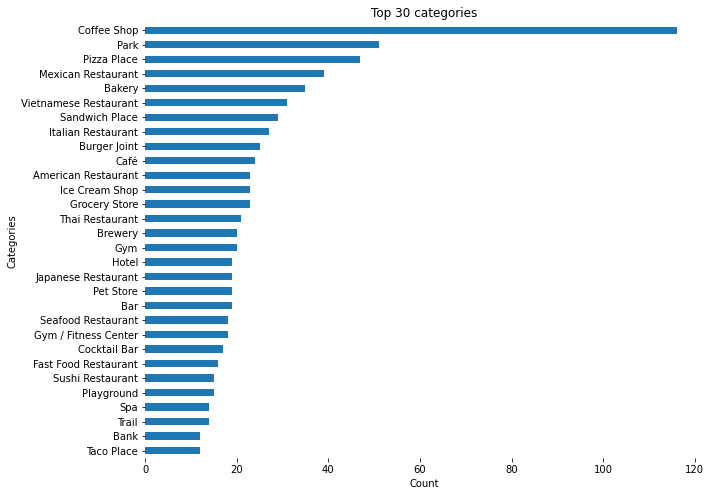

In [407]:
# top 30 categories
top30_cat = venues['Venue Category'].value_counts().head(30)
ax1 = top30_cat.plot(kind = 'barh', figsize = (10, 8))
ax1.set_title('Top 30 categories')
ax1.set_xlabel('Count')
ax1.set_ylabel('Categories')
ax1.invert_yaxis()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

Now lets explore the pet dataset futher

In [437]:
# how many different pets do we have?

pets['Species'].value_counts()

Dog     18110
Cat      7873
Goat       11
Name: Species, dtype: int64

In [410]:
# what are most common pet names?

Z = pets.groupby('Species')['Animal\'s Name'].value_counts().groupby(level=0).head(3).sort_values(ascending=False).to_frame('counts').reset_index()
Z

,Species,Animal's Name,counts
0,Dog,Luna,175
1,Dog,Charlie,168
2,Dog,Lucy,154
3,Cat,Luna,66
4,Cat,Lily,36
5,Cat,Charlie,36
6,Goat,Estelle,1
7,Goat,Coco,1
8,Goat,Charlotte,1


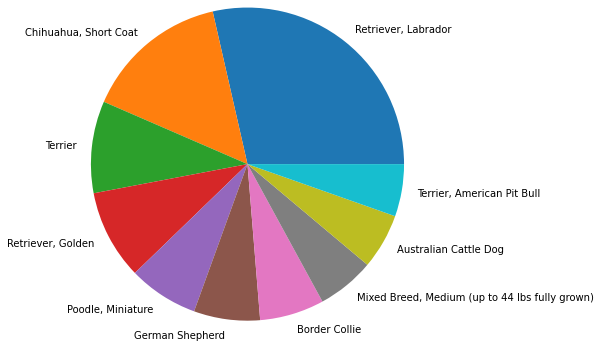

In [411]:
# what are the most common species of dog?
search = ['Dog']
dogs = pets[pets['Species'].str.contains('|'.join(search))]
dogs['Primary Breed'].value_counts(sort=True).nlargest(10).plot.pie(radius=1.8, label=' ')

In [438]:
# Creating a graph of pet population over time

import matplotlib.pyplot as plt

# Fist setting license issue date to be just the year

pets['License Issue Date'] = pets['License Issue Date'].str[-4:]

# Calculate the total number of Species

pet_count = pets[['License Issue Date', 'Species']]
Z = pet_count.groupby('Species')['License Issue Date'].value_counts().groupby(level=0).head(20).sort_values(ascending=False).to_frame('counts').reset_index()

In [439]:
# We use a pivot table so we can nicely plot the data

df_pivot = pd.pivot_table(Z, values="counts", index="License Issue Date", columns="Species")
df_pivot['Cat'] = df_pivot['Cat'].fillna(0)
df_pivot['Goat'] = df_pivot['Goat'].fillna(0)
df_pivot

Species,Cat,Dog,Goat
License Issue Date,,,
2015,1.0,3.0,0.0
2016,0.0,4.0,0.0
2017,0.0,3.0,0.0
2018,7.0,40.0,0.0
2019,1890.0,4215.0,2.0
2020,4688.0,10493.0,5.0
2021,1287.0,3352.0,4.0


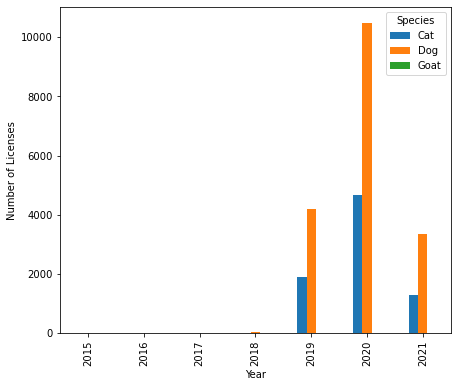

In [414]:
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of Licenses")

# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
#fig.savefig("page_views_barplot.png")

The final plot doesn't tells us not much data was collected in the years before 2019 so the License Issue data probably wont be useful

Thats my initial exploratory analysis done - lets delve deeper into the dataset.

The thing my family enjoys the most is the outdoors. Therefor I'm most interested in Neighborhoods with **Trails, Parks** and **Scenic Lookouts**

We love a good brewery - especially having a beer at the end of a long bike ride. So lets look for **Breweries**

One last thing - our favorite food is **burgers** or **sushi**

# Further Data Analysis
In this section, I use hot encoding to put my favorite categories into a separate columns and calculate the frequency of occurrence of each category. I will plot the data using folium to highlight which neighborhoods top all my favorite venues.

I will then explore the these Neighborhoods compared to the amount of dog licenses and see any are a good match with top venues and amount of dogs - which could prove a good location for my family to move to.

One hot encoding:

In [415]:
# Lets narrow down the venues list to include only our favorites
search_values = ['Neighborhood','Park','Trail','Scenic Lookout','Brewery','Sushi Restaurant','Burger Joint']
fav_venues = venues[venues['Venue Category'].str.contains('|'.join(search_values ))]
fav_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Bainbridge Island,47.64,-122.53,Bainbridge Island Brewing,47.648299,-122.525042,Brewery
7,Bainbridge Island,47.64,-122.53,Winslow,47.628315,-122.529639,Scenic Lookout
47,Bainbridge Island,47.64,-122.53,Bainbridge Island Skatepark,47.638248,-122.549088,Skate Park
48,Bainbridge Island,47.64,-122.53,Adams Park,47.626234,-122.539164,Park
90,Ballard,47.67,-122.38,8oz Burger & Co.,47.668601,-122.388192,Burger Joint


In [416]:
# one hot encoding
sea_onehot = pd.get_dummies(fav_venues[['Venue Category']], prefix="", prefix_sep="")

# add 'Neighborhood' column back to dataframe
sea_onehot['Neighborhood'] = fav_venues['Neighborhood'] 

# move 'Neighborhood' column to the first column
Neighborhood = sea_onehot.pop('Neighborhood')
sea_onehot.insert(0, 'Neighborhood', Neighborhood)
sea_onehot = sea_onehot[['Neighborhood','Park','Trail','Scenic Lookout','Brewery','Sushi Restaurant','Burger Joint']]

In [417]:
# group rows by neighborhood and find the frequency of occurrence of each category
sea_grouped = sea_onehot.groupby('Neighborhood').max().reset_index()

# Now lets total up those categories and vizualise the results on our folium map
sea_grouped['Total'] = sea_grouped.sum(axis=1) # the sum will ignore the non-numeric columns

# first add these totals to our neighborhood dataset
neighborhoods = pd.merge(sea_grouped, neighborhoods, on="Neighborhood")
neighborhoods.sort_values(by=['Total'], ascending=False)
neighborhoods

,Neighborhood,Park,Trail,Scenic Lookout,Brewery,Sushi Restaurant,Burger Joint,Total,Zipcode,Latitude,Longitude
0,Bainbridge Island,1,0,1,1,0,0,3,98110,47.64,-122.53
1,Ballard,0,0,0,1,1,1,3,98107,47.67,-122.38
2,Bellevue,1,0,0,1,1,1,4,98005,47.62,-122.16
3,Belltown,1,0,1,1,1,0,4,98121,47.62,-122.35
4,Capital Hill,1,1,1,0,1,1,5,98102,47.63,-122.32
5,Columbia City,1,1,0,0,0,1,3,98118,47.54,-122.27
6,Federal Way,0,0,0,0,0,1,1,98003,47.30,-122.31
7,Greenwood,1,1,0,0,1,1,4,98103,47.67,-122.34
8,Kirkland,1,1,0,1,0,1,4,98033,47.67,-122.18
9,Lynnwood,1,0,0,0,1,1,3,98037,47.84,-122.29


In [418]:
# Get Seattle coordinates
address = 'Seattle, WA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Seattle latitude and longitude:', latitude, longitude)

# Make an empty map
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

# add marker one by one on the map
for i in range(0,len(neighborhoods)):
   folium.Circle(
      location=[neighborhoods.iloc[i]['Latitude'], neighborhoods.iloc[i]['Longitude']],
      popup=neighborhoods.iloc[i]['Neighborhood'],
      radius=float(neighborhoods.iloc[i]['Total'])*250,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(map_seattle)

# Show the map again
map_seattle

Seattle latitude and longitude: 47.6038321 -122.3300624


**Magnolia, West Seattle and Capitol Hill** seem to have the most outdoor activites, breweries, burgers and sushi!

Lets see if any of these neighborhoods have a high number of dogs:

In [419]:
analysis = pd.merge(dogs, neighborhoods, on="Zipcode")
analysis

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,Zipcode,Neighborhood,Park,Trail,Scenic Lookout,Brewery,Sushi Restaurant,Burger Joint,Total,Latitude,Longitude
0,November 12 2015,819997,Dixie,Dog,Terrier,Mix,98125,Northgate,0,1,0,1,1,1,4,47.71,-122.30
1,March 24 2016,900605,Chloe,Dog,"Chihuahua, Short Coat",Mix,98125,Northgate,0,1,0,1,1,1,4,47.71,-122.30
2,September 29 2018,8001380,Abby,Dog,Retriever,Siberian Husky,98125,Northgate,0,1,0,1,1,1,4,47.71,-122.30
3,January 02 2019,8004336,Penelope,Dog,"Mixed Breed, Large (over 44 lbs fully grown)",Mix,98125,Northgate,0,1,0,1,1,1,4,47.71,-122.30
4,April 08 2019,8007061,Coco,Dog,"Terrier, American Pit Bull","Terrier, American Staffordshire",98125,Northgate,0,1,0,1,1,1,4,47.71,-122.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,September 04 2020,8021327,Capitan,Dog,"Chihuahua, Short Coat",Mix,98003,Federal Way,0,0,0,0,0,1,1,47.30,-122.31
9116,September 04 2020,8021328,Shaggy,Dog,"Chihuahua, Short Coat",Mix,98003,Federal Way,0,0,0,0,0,1,1,47.30,-122.31
9117,November 16 2020,8023336,Fred,Dog,Hound,Pointer,98003,Federal Way,0,0,0,0,0,1,1,47.30,-122.31
9118,January 23 2021,8025267,Chikoo,Dog,"Retriever, Labrador",Mix,98005,Bellevue,1,0,0,1,1,1,4,47.62,-122.16


In [420]:
Y = analysis.groupby('Neighborhood')['Species'].value_counts().groupby(level=0).head(10).sort_values(ascending=False).to_frame('dog counts').reset_index()
Y.head()

,Neighborhood,Species,dog counts
0,Greenwood,Dog,1510
1,Northgate,Dog,975
2,Columbia City,Dog,961
3,Ballard,Dog,825
4,West Seattle,Dog,822


Its not looking good...

**Greenwood, Northgate and Columbia** city have the highest counts of dog licenses.

None of these top 3 match with the best neighborhoods according to our favorite venues. Lets normalize the data and plot it as a bar graph instead

In [421]:
final = pd.merge(neighborhoods,Y,on="Neighborhood")
final = final[['Neighborhood','Total','dog counts']]
final.head()

,Neighborhood,Total,dog counts
0,Bainbridge Island,3,2
1,Ballard,3,825
2,Bellevue,4,1
3,Belltown,4,341
4,Capital Hill,5,543


In [422]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['Total','dog counts']
final[cols_to_norm] = final[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
final

,Neighborhood,Total,dog counts
0,Bainbridge Island,0.50,0.000663
1,Ballard,0.50,0.546057
2,Bellevue,0.75,0.000000
3,Belltown,0.75,0.225315
4,Capital Hill,1.00,0.359178
5,Columbia City,0.50,0.636183
6,Federal Way,0.00,0.001988
7,Greenwood,0.75,1.000000
8,Kirkland,0.75,0.000000
9,Lynnwood,0.50,0.001325


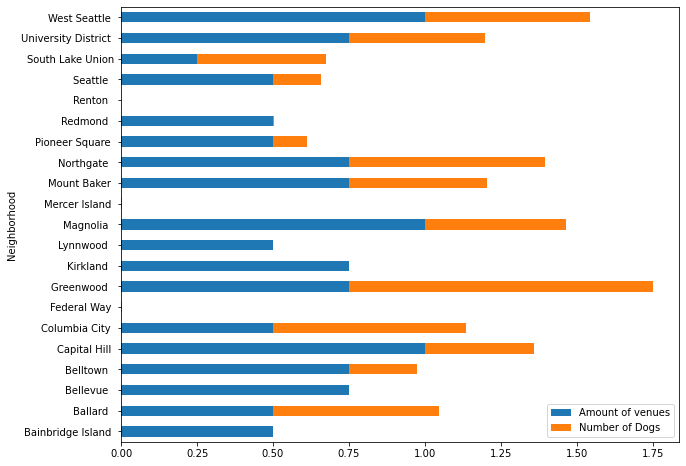

In [436]:
# Plotting the bar graph

Num_venues = final['Total'].tolist()
Num_dogs = final['dog counts'].tolist()
index = final['Neighborhood']
df = pd.DataFrame({'Amount of venues': Num_venues,
                   'Number of Dogs': Num_dogs}, index=index)
ax = df.plot.barh(stacked=True,figsize=(10,8))

From this bar graph we can see that **Greenwood** gives a good amount of our favorite venues and number of dogs. We also might want to consider **West Seattle** and **Magnolia** as Neighbourhoods to further analyse too!

# Results and Discussion
From the exploration above, we find that among the Seattle neighborhoods **Magnolia, West Seattle and Capitol Hill** seem to be the best Neighborhoods in terms of parks, views, trails, breweries, sushi and burgers!

Since there are 21 neighborhoods in Seattle, we did not look deep into each one.

We then found that **Greenwood, Northgate and Columbia** areas have the highest counts of dog licenses.

As there was no neighbourhood which was the same from both results, both datasets we concatonated and normalized to graphically show the neighbourhoods that resulted in the highest counts of dog liscences with the largest venue counts.

### *Greenwood* was our winner, with *West Seattle* and *Magnolia* also of interest

Always note that, although this analysis gives insight into the issue concerned, since our data are collected online from multiple sources, we should always be critical about the confidence of the result and only take them as a reference.

# Conclusion
If this project, we are trying to find the neighbourhoods in Seattle which would best suit our family life and which have the potential for a dog walking buisness.

We did find some neighborhoods in Seattle with both our favorite destinations and a good puppy population

It should be acknowledged that the result of this analysis is according to the categories of venues nearby the center of the neighborhood, amd there are other factors i would also consider before making up my mind, things like neighborhood wealth, crime rates, parking avaliability and so on.

I hope you had a good time through this journey of exploring the neighborhoods of Seattle with me!